In [1]:
import re
import tarfile
import numpy as np
import pandas as pd
from matplotlib import pyplot
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import random
from sklearn.model_selection import GridSearchCV

In [2]:
labels = pd.DataFrame()

In [3]:
tar = tarfile.open("faces.tar.gz", "r:gz")
for member in tar.getmembers():
    f = tar.extractfile(member)

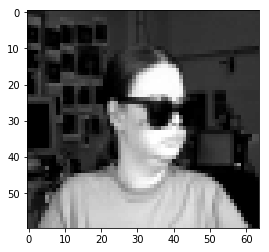

In [4]:
def read_pgm(filename, byteorder='>'):
    with open(filename, 'rb') as f:
        buffer=[]
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


if __name__ == "__main__":
    from matplotlib import pyplot
    image = read_pgm("ch4f_left_angry_sunglasses_2.pgm", byteorder='<')
    
    pyplot.imshow(image, pyplot.cm.gray)
    pyplot.show()

In [5]:
entries = os.listdir('faces/')
axe_labels=[]
axe=[]
bs=list()
for entry in entries:
    entry=entry+'/'
    bs = os.listdir('faces/'+entry)
    for things in bs:
        if len(things.split(".")[0].split("_"))==5:
            if things.split(".")[0].split("_")[4]=="2":
                try:
                    nd=things.split(".")[0].split("_")[0:4]
                    image = read_pgm('faces/'+entry+things, byteorder='<')
                    axe.append(image.reshape(1,3840)[0])
                    axe_labels.append(nd)
                    
                except:
                    print("file", things,"is not retreated")
            
#                 pyplot.imshow(image, pyplot.cm.gray)
#                 pyplot.show()
down_axe=[]
new_axe_labels=[]
k=0
for i in range(len(axe)):
    down_axe_1=[]
    down_axe_2=[]


    for j in range(int(len(axe[i])/2)):

        temp=[]
        temp.append([axe[i][2*j],axe[i][2*j+1]])
        down_axe_1.append(temp[0][random.randint(0,1)])
        down_axe_2.append(temp[0][random.randint(0,1)])

    down_axe.append(down_axe_1)
    down_axe.append(down_axe_2)
    new_axe_labels.append(axe_labels[i])
    new_axe_labels.append(axe_labels[i])


file boland_left_sad_sunglasses_2.pgm is not retreated
file boland_right_angry_open_2.pgm is not retreated
file boland_right_neutral_open_2.pgm is not retreated
file boland_straight_happy_open_2.pgm is not retreated
file megak_straight_angry_open_2.pgm is not retreated
file night_left_angry_open_2.pgm is not retreated
file night_left_neutral_open_2.pgm is not retreated
file night_left_sad_open_2.pgm is not retreated
file night_right_angry_open_2.pgm is not retreated
file night_right_neutral_open_2.pgm is not retreated
file phoebe_left_neutral_sunglasses_2.pgm is not retreated
file phoebe_left_sad_sunglasses_2.pgm is not retreated
file phoebe_straight_neutral_sunglasses_2.pgm is not retreated
file phoebe_straight_sad_sunglasses_2.pgm is not retreated
file phoebe_up_angry_open_2.pgm is not retreated
file phoebe_up_neutral_open_2.pgm is not retreated
file phoebe_up_sad_open_2.pgm is not retreated


In [6]:
axe_labels

[['an2i', 'left', 'angry', 'open'],
 ['an2i', 'left', 'angry', 'sunglasses'],
 ['an2i', 'left', 'happy', 'open'],
 ['an2i', 'left', 'happy', 'sunglasses'],
 ['an2i', 'left', 'neutral', 'open'],
 ['an2i', 'left', 'neutral', 'sunglasses'],
 ['an2i', 'left', 'sad', 'open'],
 ['an2i', 'left', 'sad', 'sunglasses'],
 ['an2i', 'right', 'angry', 'open'],
 ['an2i', 'right', 'angry', 'sunglasses'],
 ['an2i', 'right', 'happy', 'open'],
 ['an2i', 'right', 'happy', 'sunglasses'],
 ['an2i', 'right', 'neutral', 'open'],
 ['an2i', 'right', 'neutral', 'sunglasses'],
 ['an2i', 'right', 'sad', 'open'],
 ['an2i', 'right', 'sad', 'sunglasses'],
 ['an2i', 'straight', 'angry', 'open'],
 ['an2i', 'straight', 'angry', 'sunglasses'],
 ['an2i', 'straight', 'happy', 'open'],
 ['an2i', 'straight', 'happy', 'sunglasses'],
 ['an2i', 'straight', 'neutral', 'open'],
 ['an2i', 'straight', 'neutral', 'sunglasses'],
 ['an2i', 'straight', 'sad', 'open'],
 ['an2i', 'straight', 'sad', 'sunglasses'],
 ['an2i', 'up', 'angry',

In [7]:
axe

[array([17,  1,  8, ..., 82, 59,  7], dtype=uint8),
 array([0, 0, 0, ..., 7, 4, 0], dtype=uint8),
 array([17,  0,  8, ..., 32,  5,  1], dtype=uint8),
 array([18,  1, 10, ...,  8,  4,  0], dtype=uint8),
 array([45, 57, 34, ...,  0,  0,  0], dtype=uint8),
 array([18,  1, 11, ...,  9,  5,  0], dtype=uint8),
 array([16,  1,  8, ..., 79,  8,  0], dtype=uint8),
 array([18,  1,  9, ...,  9,  4,  0], dtype=uint8),
 array([18,  1,  9, ..., 83, 86, 58], dtype=uint8),
 array([19,  1, 10, ...,  9,  5,  0], dtype=uint8),
 array([17,  1,  9, ..., 67, 72, 39], dtype=uint8),
 array([19,  1, 10, ..., 10,  6,  0], dtype=uint8),
 array([47, 59, 36, ...,  0,  0,  0], dtype=uint8),
 array([19,  1, 10, ..., 10,  6,  1], dtype=uint8),
 array([17,  1,  8, ..., 69, 64, 78], dtype=uint8),
 array([19,  1, 10, ...,  9,  4,  0], dtype=uint8),
 array([16,  1,  9, ..., 86, 45,  6], dtype=uint8),
 array([18,  1,  9, ...,  9,  4,  0], dtype=uint8),
 array([46, 58, 34, ...,  0,  0,  0], dtype=uint8),
 array([18,  1,  9

In [8]:
down_axe_final=[]
for i in down_axe:
    i=np.asarray(i)
    temp=i.reshape(60,32)
    har_axe=[]
    for k in range(int(len(temp)/2)):
        har_axe.append(temp[2*k])
    har_axe=np.asarray(har_axe)
    har_axe=har_axe.reshape(1,960)[0]
    down_axe_final.append(har_axe)
data = pd.DataFrame(down_axe_final)
labels = pd.DataFrame(new_axe_labels)
data
# pyplot.imshow(np.asarray(data[2]).reshape(30,32), pyplot.cm.gray)
# pyplot.show()  

,0,1,2,3,4,5,6,7,8,9,...,950,951,952,953,954,955,956,957,958,959
0,1,58,24,26,54,54,45,42,42,39,...,36,50,48,103,68,83,94,38,77,1
1,1,58,24,26,60,54,45,43,42,40,...,86,50,62,53,68,83,55,38,79,53
2,0,0,0,0,0,0,0,0,0,0,...,20,108,67,85,99,66,42,19,18,4
3,0,0,0,0,0,0,0,0,0,0,...,20,66,77,85,99,65,69,59,18,4
4,17,8,35,27,55,55,46,43,41,40,...,41,39,101,56,60,102,62,79,59,6
5,17,8,24,27,55,55,46,44,41,41,...,55,15,28,87,88,102,42,42,13,0
6,1,10,25,28,63,57,48,45,44,43,...,82,66,63,105,105,85,78,74,18,5
7,18,63,25,27,57,49,47,46,45,43,...,89,66,63,105,105,85,78,19,18,5
8,45,34,37,66,47,46,44,44,42,40,...,61,88,104,39,76,23,12,4,1,0
9,45,36,37,58,47,46,44,44,41,40,...,61,88,104,39,76,45,20,4,0,0


In [9]:
axe

[array([17,  1,  8, ..., 82, 59,  7], dtype=uint8),
 array([0, 0, 0, ..., 7, 4, 0], dtype=uint8),
 array([17,  0,  8, ..., 32,  5,  1], dtype=uint8),
 array([18,  1, 10, ...,  8,  4,  0], dtype=uint8),
 array([45, 57, 34, ...,  0,  0,  0], dtype=uint8),
 array([18,  1, 11, ...,  9,  5,  0], dtype=uint8),
 array([16,  1,  8, ..., 79,  8,  0], dtype=uint8),
 array([18,  1,  9, ...,  9,  4,  0], dtype=uint8),
 array([18,  1,  9, ..., 83, 86, 58], dtype=uint8),
 array([19,  1, 10, ...,  9,  5,  0], dtype=uint8),
 array([17,  1,  9, ..., 67, 72, 39], dtype=uint8),
 array([19,  1, 10, ..., 10,  6,  0], dtype=uint8),
 array([47, 59, 36, ...,  0,  0,  0], dtype=uint8),
 array([19,  1, 10, ..., 10,  6,  1], dtype=uint8),
 array([17,  1,  8, ..., 69, 64, 78], dtype=uint8),
 array([19,  1, 10, ...,  9,  4,  0], dtype=uint8),
 array([16,  1,  9, ..., 86, 45,  6], dtype=uint8),
 array([18,  1,  9, ...,  9,  4,  0], dtype=uint8),
 array([46, 58, 34, ...,  0,  0,  0], dtype=uint8),
 array([18,  1,  9

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
         data, labels, test_size=0.33, random_state=42)


# Logistic regression for glass and without glass

In [11]:
from sklearn.linear_model import LogisticRegression


In [12]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [13]:
perf=[]
for i in range(65,100,1):
    pca = PCA(i/100)
    pca.fit(X_train)
    X_train_pcaed = pca.transform(X_train)
    X_test_pcaed = pca.transform(X_test)
    logisticRegr.fit(X_train_pcaed, y_train[3])
    perf.append(logisticRegr.score(X_test_pcaed, y_test[3]))
print(perf)


C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

[0.6807980049875312, 0.6807980049875312, 0.6783042394014963, 0.6783042394014963, 0.7182044887780549, 0.743142144638404, 0.743142144638404, 0.743142144638404, 0.743142144638404, 0.7306733167082294, 0.7107231920199502, 0.7406483790523691, 0.7331670822942643, 0.7630922693266833, 0.7531172069825436, 0.770573566084788, 0.773067331670823, 0.7655860349127181, 0.7655860349127181, 0.7905236907730673, 0.8403990024937655, 0.8403990024937655, 0.8379052369077307, 0.8628428927680798, 0.85785536159601, 0.8778054862842892, 0.8728179551122195, 0.8678304239401496, 0.8728179551122195, 0.8927680798004988, 0.912718204488778, 0.9226932668329177, 0.9251870324189526, 0.9376558603491272, 0.942643391521197]


C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [14]:
perf=np.asarray(perf)
print(65+perf.argmax(),"is the best performance with the performance level of",perf.max(),"and it has",
      len(pca.explained_variance_ratio_),"variables")

99 is the best performance with the performance level of 0.942643391521197 and it has 355 variables


In [15]:
x=65+perf.argmax()
pca = PCA(x/100)
pca.fit(X_train)
X_train_pcaed = pca.transform(X_train)
X_test_pcaed = pca.transform(X_test)
len(pca.explained_variance_ratio_)

355

# Neural Network

In [16]:
import tensorflow as tf

In [17]:
from tensorflow import estimator 

In [18]:
from sklearn import preprocessing

# Names

In [19]:
le = preprocessing.LabelEncoder()

In [20]:
le.fit(y_train[0])

LabelEncoder()

In [21]:
list(le.classes_)

['an2i',
 'at33',
 'boland',
 'bpm',
 'ch4f',
 'cheyer',
 'choon',
 'danieln',
 'glickman',
 'karyadi',
 'kawamura',
 'kk49',
 'megak',
 'mitchell',
 'night',
 'phoebe',
 'saavik',
 'steffi',
 'sz24',
 'tammo']

In [22]:
Y=le.transform(y_train[0]) 

In [23]:
from tensorflow.contrib.keras import models

In [24]:
dnn_keras_model = models.Sequential()

In [25]:
from tensorflow.contrib.keras import layers

In [26]:
dnn_keras_model.add(layers.Dense(units=5,input_dim=355,activation='relu'))

W0711 14:33:23.100495 11500 deprecation.py:506] From C:\Users\Apple\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [27]:
dnn_keras_model.add(layers.Dense(units=5,activation='relu'))
dnn_keras_model.add(layers.Dense(units=5,activation='relu'))

In [28]:
dnn_keras_model.add(layers.Dense(units=20,activation='softmax'))

In [29]:
feat_cols = [tf.feature_column.numeric_column("x", shape=[355])]

In [30]:
from tensorflow.contrib.keras import losses,optimizers,metrics

In [31]:
losses.sparse_categorical_crossentropy

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)>

In [32]:
dnn_keras_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
dnn_keras_model.fit(X_train_pcaed,Y,epochs=500)

Epoch 1/500
813/813 [==============================] - 0s 162us/sample - loss: 26.4762 - acc: 0.0467
Epoch 2/500
813/813 [==============================] - 0s 69us/sample - loss: 15.5412 - acc: 0.0529
Epoch 3/500
813/813 [==============================] - 0s 64us/sample - loss: 9.7417 - acc: 0.0652
Epoch 4/500
813/813 [==============================] - 0s 59us/sample - loss: 6.8262 - acc: 0.0701
Epoch 5/500
813/813 [==============================] - 0s 74us/sample - loss: 5.1622 - acc: 0.0701
Epoch 6/500
813/813 [==============================] - 0s 74us/sample - loss: 4.2049 - acc: 0.0726
Epoch 7/500
813/813 [==============================] - 0s 69us/sample - loss: 3.5941 - acc: 0.0738
Epoch 8/500
813/813 [==============================] - 0s 59us/sample - loss: 3.1781 - acc: 0.0873
Epoch 9/500
813/813 [==============================] - 0s 79us/sample - loss: 2.9068 - acc: 0.1156
Epoch 10/500
813/813 [==============================] - 0s 74us/sample - loss: 2.7256 - acc: 0.1242
Epoch 

Epoch 83/500
813/813 [==============================] - 0s 59us/sample - loss: 0.9505 - acc: 0.6790
Epoch 84/500
813/813 [==============================] - 0s 79us/sample - loss: 0.9391 - acc: 0.6802
Epoch 85/500
813/813 [==============================] - 0s 64us/sample - loss: 0.9378 - acc: 0.6790
Epoch 86/500
813/813 [==============================] - 0s 64us/sample - loss: 0.9192 - acc: 0.6851
Epoch 87/500
813/813 [==============================] - 0s 59us/sample - loss: 0.9195 - acc: 0.6827
Epoch 88/500
813/813 [==============================] - 0s 64us/sample - loss: 0.8924 - acc: 0.6925
Epoch 89/500
813/813 [==============================] - 0s 59us/sample - loss: 0.8793 - acc: 0.6827
Epoch 90/500
813/813 [==============================] - 0s 54us/sample - loss: 0.8740 - acc: 0.6814
Epoch 91/500
813/813 [==============================] - 0s 54us/sample - loss: 0.8555 - acc: 0.6888
Epoch 92/500
813/813 [==============================] - 0s 54us/sample - loss: 0.8377 - acc: 0.7232


813/813 [==============================] - 0s 74us/sample - loss: 0.3339 - acc: 0.8831
Epoch 246/500
813/813 [==============================] - 0s 89us/sample - loss: 0.3322 - acc: 0.8831
Epoch 247/500
813/813 [==============================] - 0s 89us/sample - loss: 0.3329 - acc: 0.8831
Epoch 248/500
813/813 [==============================] - 0s 84us/sample - loss: 0.3337 - acc: 0.8795
Epoch 249/500
813/813 [==============================] - 0s 79us/sample - loss: 0.3380 - acc: 0.8782
Epoch 250/500
813/813 [==============================] - 0s 89us/sample - loss: 0.3312 - acc: 0.8819
Epoch 251/500
813/813 [==============================] - 0s 98us/sample - loss: 0.3289 - acc: 0.8881
Epoch 252/500
813/813 [==============================] - 0s 94us/sample - loss: 0.3290 - acc: 0.8819
Epoch 253/500
813/813 [==============================] - 0s 93us/sample - loss: 0.3277 - acc: 0.8831
Epoch 254/500
813/813 [==============================] - 0s 84us/sample - loss: 0.3272 - acc: 0.8856
Epoc

813/813 [==============================] - 0s 89us/sample - loss: 0.2351 - acc: 0.9200
Epoch 406/500
813/813 [==============================] - 0s 74us/sample - loss: 0.2322 - acc: 0.9176
Epoch 407/500
813/813 [==============================] - 0s 79us/sample - loss: 0.2286 - acc: 0.9200
Epoch 408/500
813/813 [==============================] - 0s 74us/sample - loss: 0.2297 - acc: 0.9200
Epoch 409/500
813/813 [==============================] - 0s 69us/sample - loss: 0.2310 - acc: 0.9213
Epoch 410/500
813/813 [==============================] - 0s 157us/sample - loss: 0.2270 - acc: 0.9188
Epoch 411/500
813/813 [==============================] - 0s 118us/sample - loss: 0.2249 - acc: 0.9213
Epoch 412/500
813/813 [==============================] - 0s 98us/sample - loss: 0.2214 - acc: 0.9225
Epoch 413/500
813/813 [==============================] - 0s 98us/sample - loss: 0.2243 - acc: 0.9213
Epoch 414/500
813/813 [==============================] - 0s 84us/sample - loss: 0.2202 - acc: 0.9250
Ep

813/813 [==============================] - 0s 79us/sample - loss: 0.1839 - acc: 0.9410
Epoch 487/500
813/813 [==============================] - 0s 93us/sample - loss: 0.1837 - acc: 0.9410
Epoch 488/500
813/813 [==============================] - 0s 113us/sample - loss: 0.1837 - acc: 0.9410
Epoch 489/500
813/813 [==============================] - 0s 98us/sample - loss: 0.1837 - acc: 0.9410
Epoch 490/500
813/813 [==============================] - 0s 84us/sample - loss: 0.1829 - acc: 0.9410
Epoch 491/500
813/813 [==============================] - 0s 84us/sample - loss: 0.1844 - acc: 0.9410
Epoch 492/500
813/813 [==============================] - 0s 84us/sample - loss: 0.1826 - acc: 0.9410
Epoch 493/500
813/813 [==============================] - 0s 98us/sample - loss: 0.1826 - acc: 0.9410
Epoch 494/500
813/813 [==============================] - 0s 98us/sample - loss: 0.2204 - acc: 0.9410
Epoch 495/500
813/813 [==============================] - 0s 74us/sample - loss: 0.1843 - acc: 0.9410
Epo

In [34]:
predictions = dnn_keras_model.predict_classes(X_test_pcaed)

In [35]:
from sklearn.metrics import classification_report

In [36]:
Y_test=le.transform(y_test[0]) 
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       0.63      0.86      0.73        14
           2       0.65      0.65      0.65        17
           3       0.91      0.88      0.89        24
           4       0.80      1.00      0.89        20
           5       0.96      1.00      0.98        23
           6       0.96      1.00      0.98        23
           7       0.90      0.83      0.86        23
           8       0.95      0.95      0.95        19
           9       0.93      0.49      0.64        53
          10       0.63      0.80      0.71        15
          11       0.88      0.88      0.88        24
          12       0.89      0.94      0.91        17
          13       0.60      0.75      0.67        12
          14       1.00      0.89      0.94        18
          15       0.86      0.86      0.86        14
          16       0.87      0.93      0.90        14
          17       0.95    

# Pose

In [37]:
le.fit(y_train[1])

LabelEncoder()

In [38]:
list(le.classes_)

['left', 'right', 'straight', 'up']

In [39]:
Y=le.transform(y_train[1]) 

In [40]:
dnn_keras_model = models.Sequential()

In [41]:
dnn_keras_model.add(layers.Dense(units=5,input_dim=355,activation='relu'))

In [42]:
dnn_keras_model.add(layers.Dense(units=5,activation='relu'))
dnn_keras_model.add(layers.Dense(units=5,activation='relu'))

In [43]:
dnn_keras_model.add(layers.Dense(units=4,activation='softmax'))

In [44]:
feat_cols = [tf.feature_column.numeric_column("x", shape=[355])]

In [45]:
losses.sparse_categorical_crossentropy

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)>

In [46]:
dnn_keras_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
dnn_keras_model.fit(X_train_pcaed,Y,epochs=500)

Epoch 1/500
813/813 [==============================] - 0s 138us/sample - loss: 8.6145 - acc: 0.2854
Epoch 2/500
813/813 [==============================] - 0s 64us/sample - loss: 3.7288 - acc: 0.3419
Epoch 3/500
813/813 [==============================] - 0s 54us/sample - loss: 2.0993 - acc: 0.4096
Epoch 4/500
813/813 [==============================] - 0s 69us/sample - loss: 1.6172 - acc: 0.4194
Epoch 5/500
813/813 [==============================] - 0s 64us/sample - loss: 1.4036 - acc: 0.4785
Epoch 6/500
813/813 [==============================] - 0s 59us/sample - loss: 1.2901 - acc: 0.4859
Epoch 7/500
813/813 [==============================] - 0s 54us/sample - loss: 1.2102 - acc: 0.5055
Epoch 8/500
813/813 [==============================] - 0s 59us/sample - loss: 1.1568 - acc: 0.5228
Epoch 9/500
813/813 [==============================] - 0s 59us/sample - loss: 1.1140 - acc: 0.5289
Epoch 10/500
813/813 [==============================] - 0s 64us/sample - loss: 1.0908 - acc: 0.5363
Epoch 11

Epoch 83/500
813/813 [==============================] - 0s 89us/sample - loss: 0.4241 - acc: 0.8512
Epoch 84/500
813/813 [==============================] - 0s 103us/sample - loss: 0.4230 - acc: 0.8499
Epoch 85/500
813/813 [==============================] - 0s 69us/sample - loss: 0.4214 - acc: 0.8524
Epoch 86/500
813/813 [==============================] - 0s 69us/sample - loss: 0.4204 - acc: 0.8487
Epoch 87/500
813/813 [==============================] - 0s 74us/sample - loss: 0.4220 - acc: 0.8549
Epoch 88/500
813/813 [==============================] - 0s 69us/sample - loss: 0.4129 - acc: 0.8561
Epoch 89/500
813/813 [==============================] - 0s 84us/sample - loss: 0.4171 - acc: 0.8561
Epoch 90/500
813/813 [==============================] - 0s 79us/sample - loss: 0.4234 - acc: 0.8512
Epoch 91/500
813/813 [==============================] - 0s 84us/sample - loss: 0.4273 - acc: 0.8487
Epoch 92/500
813/813 [==============================] - 0s 64us/sample - loss: 0.4149 - acc: 0.8524

Epoch 164/500
813/813 [==============================] - 0s 59us/sample - loss: 0.2625 - acc: 0.9200
Epoch 165/500
813/813 [==============================] - 0s 64us/sample - loss: 0.2505 - acc: 0.9237
Epoch 166/500
813/813 [==============================] - 0s 64us/sample - loss: 0.2501 - acc: 0.9225
Epoch 167/500
813/813 [==============================] - 0s 64us/sample - loss: 0.2403 - acc: 0.9287
Epoch 168/500
813/813 [==============================] - 0s 59us/sample - loss: 0.2345 - acc: 0.9299
Epoch 169/500
813/813 [==============================] - 0s 74us/sample - loss: 0.2357 - acc: 0.9287
Epoch 170/500
813/813 [==============================] - 0s 69us/sample - loss: 0.2384 - acc: 0.9311
Epoch 171/500
813/813 [==============================] - 0s 64us/sample - loss: 0.2302 - acc: 0.9336
Epoch 172/500
813/813 [==============================] - 0s 64us/sample - loss: 0.2265 - acc: 0.9336
Epoch 173/500
813/813 [==============================] - 0s 64us/sample - loss: 0.2190 - ac

813/813 [==============================] - 0s 64us/sample - loss: 0.0938 - acc: 0.9766
Epoch 246/500
813/813 [==============================] - 0s 59us/sample - loss: 0.0888 - acc: 0.9766
Epoch 247/500
813/813 [==============================] - 0s 59us/sample - loss: 0.0885 - acc: 0.9766
Epoch 248/500
813/813 [==============================] - 0s 54us/sample - loss: 0.0889 - acc: 0.9766
Epoch 249/500
813/813 [==============================] - 0s 79us/sample - loss: 0.0875 - acc: 0.9766
Epoch 250/500
813/813 [==============================] - 0s 59us/sample - loss: 0.0956 - acc: 0.9766
Epoch 251/500
813/813 [==============================] - 0s 54us/sample - loss: 0.0937 - acc: 0.9766
Epoch 252/500
813/813 [==============================] - 0s 59us/sample - loss: 0.0919 - acc: 0.9766
Epoch 253/500
813/813 [==============================] - 0s 64us/sample - loss: 0.0936 - acc: 0.9754
Epoch 254/500
813/813 [==============================] - 0s 54us/sample - loss: 0.0898 - acc: 0.9766
Epoc

813/813 [==============================] - 0s 59us/sample - loss: 0.0799 - acc: 0.9840
Epoch 407/500
813/813 [==============================] - 0s 64us/sample - loss: 0.0798 - acc: 0.9840
Epoch 408/500
813/813 [==============================] - 0s 79us/sample - loss: 0.0796 - acc: 0.9840
Epoch 409/500
813/813 [==============================] - 0s 69us/sample - loss: 0.0794 - acc: 0.9840
Epoch 410/500
813/813 [==============================] - 0s 59us/sample - loss: 0.0793 - acc: 0.9840
Epoch 411/500
813/813 [==============================] - 0s 59us/sample - loss: 0.0793 - acc: 0.9840
Epoch 412/500
813/813 [==============================] - 0s 54us/sample - loss: 0.0791 - acc: 0.9840
Epoch 413/500
813/813 [==============================] - 0s 59us/sample - loss: 0.0789 - acc: 0.9840
Epoch 414/500
813/813 [==============================] - 0s 59us/sample - loss: 0.0788 - acc: 0.9840
Epoch 415/500
813/813 [==============================] - 0s 64us/sample - loss: 0.0788 - acc: 0.9840
Epoc

In [48]:
predictions = dnn_keras_model.predict_classes(X_test_pcaed)

In [49]:
Y_test=le.transform(y_test[1]) 
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       102
           1       0.89      0.87      0.88        98
           2       0.81      0.87      0.84       100
           3       0.79      0.82      0.81       101

   micro avg       0.84      0.84      0.84       401
   macro avg       0.85      0.84      0.84       401
weighted avg       0.85      0.84      0.84       401



# Expression

In [50]:
le.fit(y_train[2])

LabelEncoder()

In [51]:
list(le.classes_)

['angry', 'happy', 'neutral', 'sad']

In [52]:
Y=le.transform(y_train[2]) 

In [53]:
dnn_keras_model = models.Sequential()

In [54]:
dnn_keras_model.add(layers.Dense(units=5,input_dim=355,activation='relu'))

In [55]:
dnn_keras_model.add(layers.Dense(units=5,activation='relu'))
dnn_keras_model.add(layers.Dense(units=5,activation='relu'))

In [56]:
dnn_keras_model.add(layers.Dense(units=4,activation='softmax'))

In [57]:
feat_cols = [tf.feature_column.numeric_column("x", shape=[355])]

In [58]:
losses.sparse_categorical_crossentropy

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)>

In [59]:
dnn_keras_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
dnn_keras_model.fit(X_train_pcaed,Y,epochs=500)

Epoch 1/500
813/813 [==============================] - 0s 167us/sample - loss: 28.7223 - acc: 0.2239
Epoch 2/500
813/813 [==============================] - 0s 64us/sample - loss: 16.4399 - acc: 0.2251
Epoch 3/500
813/813 [==============================] - 0s 64us/sample - loss: 10.0342 - acc: 0.2325
Epoch 4/500
813/813 [==============================] - 0s 64us/sample - loss: 6.4719 - acc: 0.2448
Epoch 5/500
813/813 [==============================] - 0s 69us/sample - loss: 4.4504 - acc: 0.2608
Epoch 6/500
813/813 [==============================] - ETA: 0s - loss: 3.3174 - acc: 0.282 - 0s 84us/sample - loss: 3.3275 - acc: 0.2878
Epoch 7/500
813/813 [==============================] - 0s 64us/sample - loss: 2.6880 - acc: 0.3014
Epoch 8/500
813/813 [==============================] - 0s 59us/sample - loss: 2.2203 - acc: 0.3050
Epoch 9/500
813/813 [==============================] - 0s 74us/sample - loss: 1.8992 - acc: 0.3260
Epoch 10/500
813/813 [==============================] - 0s 64us/sam

813/813 [==============================] - 0s 59us/sample - loss: 0.4797 - acc: 0.8290
Epoch 164/500
813/813 [==============================] - 0s 54us/sample - loss: 0.4999 - acc: 0.8155
Epoch 165/500
813/813 [==============================] - 0s 69us/sample - loss: 0.4850 - acc: 0.8192
Epoch 166/500
813/813 [==============================] - 0s 49us/sample - loss: 0.4874 - acc: 0.8192
Epoch 167/500
813/813 [==============================] - 0s 59us/sample - loss: 0.4941 - acc: 0.8192
Epoch 168/500
813/813 [==============================] - 0s 59us/sample - loss: 0.4892 - acc: 0.8192
Epoch 169/500
813/813 [==============================] - 0s 54us/sample - loss: 0.4886 - acc: 0.8130
Epoch 170/500
813/813 [==============================] - 0s 84us/sample - loss: 0.4769 - acc: 0.8229
Epoch 171/500
813/813 [==============================] - 0s 84us/sample - loss: 0.4668 - acc: 0.8241
Epoch 172/500
813/813 [==============================] - 0s 59us/sample - loss: 0.4584 - acc: 0.8278
Epoc

813/813 [==============================] - 0s 49us/sample - loss: 0.3426 - acc: 0.8561
Epoch 324/500
813/813 [==============================] - 0s 79us/sample - loss: 0.3360 - acc: 0.8585
Epoch 325/500
813/813 [==============================] - 0s 69us/sample - loss: 0.3297 - acc: 0.8573
Epoch 326/500
813/813 [==============================] - 0s 79us/sample - loss: 0.3271 - acc: 0.8610
Epoch 327/500
813/813 [==============================] - 0s 74us/sample - loss: 0.3264 - acc: 0.8598
Epoch 328/500
813/813 [==============================] - 0s 74us/sample - loss: 0.3255 - acc: 0.8598
Epoch 329/500
813/813 [==============================] - 0s 64us/sample - loss: 0.3251 - acc: 0.8585
Epoch 330/500
813/813 [==============================] - 0s 59us/sample - loss: 0.3243 - acc: 0.8573
Epoch 331/500
813/813 [==============================] - 0s 59us/sample - loss: 0.3248 - acc: 0.8585
Epoch 332/500
813/813 [==============================] - 0s 59us/sample - loss: 0.3239 - acc: 0.8585
Epoc

813/813 [==============================] - 0s 59us/sample - loss: 0.2716 - acc: 0.8868
Epoch 486/500
813/813 [==============================] - 0s 59us/sample - loss: 0.2710 - acc: 0.8758
Epoch 487/500
813/813 [==============================] - 0s 69us/sample - loss: 0.2709 - acc: 0.8856
Epoch 488/500
813/813 [==============================] - 0s 59us/sample - loss: 0.2703 - acc: 0.8868
Epoch 489/500
813/813 [==============================] - 0s 69us/sample - loss: 0.2882 - acc: 0.8819
Epoch 490/500
813/813 [==============================] - 0s 59us/sample - loss: 0.2896 - acc: 0.8831
Epoch 491/500
813/813 [==============================] - 0s 59us/sample - loss: 0.2746 - acc: 0.8856
Epoch 492/500
813/813 [==============================] - 0s 59us/sample - loss: 0.2709 - acc: 0.8831
Epoch 493/500
813/813 [==============================] - 0s 84us/sample - loss: 0.2710 - acc: 0.8733
Epoch 494/500
813/813 [==============================] - 0s 74us/sample - loss: 0.2707 - acc: 0.8819
Epoc

In [61]:
predictions = dnn_keras_model.predict_classes(X_test_pcaed)

In [62]:
Y_test=le.transform(y_test[2]) 
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.34      0.27      0.30       114
           1       0.30      0.28      0.29       112
           2       0.15      0.24      0.19        74
           3       0.24      0.20      0.22       101

   micro avg       0.25      0.25      0.25       401
   macro avg       0.26      0.25      0.25       401
weighted avg       0.27      0.25      0.25       401



In [63]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pcaed, Y)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pcaed)

print(classification_report(Y_test, y_pred))

Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
              precision    recall  f1-score   support

           0       0.75      0.03      0.06        91
           1       0.50      0.01      0.02       105
           2       0.00      0.00      0.00       120
           3       0.21      0.99      0.35        85

   micro avg       0.22      0.22      0.22       401
   macro avg       0.37      0.26      0.11       401
weighted avg       0.35      0.22      0.09       401



C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bad results, so lets try the original 60*64 pics

In [64]:
temp_data=pd.DataFrame(axe)
temp_labels=pd.DataFrame(axe_labels)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
         temp_data, temp_labels, test_size=0.33, random_state=42)

In [66]:
Y=le.transform(y_train[2]) 

In [67]:
pca = PCA(0.95)
pca.fit(X_train)
X_train_pcaed = pca.transform(X_train)
X_test_pcaed = pca.transform(X_test)

In [68]:
len(pca.explained_variance_ratio_)

97

In [69]:
dnn_keras_model = models.Sequential()
dnn_keras_model.add(layers.Dense(units=5,input_dim=97,activation='relu',kernel_regularizer='l2'))
dnn_keras_model.add(layers.Dense(units=5,activation='relu'))
dnn_keras_model.add(layers.Dense(units=5,activation='relu'))
dnn_keras_model.add(layers.Dense(units=4,activation='softmax'))
feat_cols = [tf.feature_column.numeric_column("x", shape=[97])]
losses.sparse_categorical_crossentropy
dnn_keras_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
dnn_keras_model.fit(X_train_pcaed,Y,epochs=1000)

Epoch 1/1000
406/406 [==============================] - 0s 296us/sample - loss: 66.0174 - acc: 0.2635
Epoch 2/1000
406/406 [==============================] - 0s 59us/sample - loss: 48.2565 - acc: 0.2635
Epoch 3/1000
406/406 [==============================] - 0s 89us/sample - loss: 35.4699 - acc: 0.2685
Epoch 4/1000
406/406 [==============================] - 0s 59us/sample - loss: 28.5590 - acc: 0.2783
Epoch 5/1000
406/406 [==============================] - 0s 69us/sample - loss: 23.7698 - acc: 0.2808
Epoch 6/1000
406/406 [==============================] - 0s 79us/sample - loss: 20.0718 - acc: 0.2980
Epoch 7/1000
406/406 [==============================] - 0s 59us/sample - loss: 17.1800 - acc: 0.2956
Epoch 8/1000
406/406 [==============================] - 0s 89us/sample - loss: 14.8589 - acc: 0.2931
Epoch 9/1000
406/406 [==============================] - 0s 59us/sample - loss: 13.1979 - acc: 0.2980
Epoch 10/1000
406/406 [==============================] - 0s 59us/sample - loss: 11.8176 - 

406/406 [==============================] - 0s 69us/sample - loss: 1.1708 - acc: 0.4532
Epoch 162/1000
406/406 [==============================] - 0s 79us/sample - loss: 1.1683 - acc: 0.4581
Epoch 163/1000
406/406 [==============================] - 0s 69us/sample - loss: 1.1551 - acc: 0.4557
Epoch 164/1000
406/406 [==============================] - 0s 89us/sample - loss: 1.1289 - acc: 0.4704
Epoch 165/1000
406/406 [==============================] - 0s 69us/sample - loss: 1.1387 - acc: 0.4803
Epoch 166/1000
406/406 [==============================] - 0s 79us/sample - loss: 1.1264 - acc: 0.4901
Epoch 167/1000
406/406 [==============================] - 0s 79us/sample - loss: 1.1285 - acc: 0.4877
Epoch 168/1000
406/406 [==============================] - 0s 69us/sample - loss: 1.1250 - acc: 0.4828
Epoch 169/1000
406/406 [==============================] - 0s 79us/sample - loss: 1.1349 - acc: 0.4778
Epoch 170/1000
406/406 [==============================] - 0s 69us/sample - loss: 1.1252 - acc: 0.

406/406 [==============================] - 0s 69us/sample - loss: 1.0005 - acc: 0.5271
Epoch 322/1000
406/406 [==============================] - 0s 59us/sample - loss: 1.0246 - acc: 0.5296
Epoch 323/1000
406/406 [==============================] - 0s 79us/sample - loss: 1.0054 - acc: 0.5493
Epoch 324/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.9832 - acc: 0.5517
Epoch 325/1000
406/406 [==============================] - 0s 89us/sample - loss: 0.9742 - acc: 0.5567
Epoch 326/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.9740 - acc: 0.5493
Epoch 327/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.9712 - acc: 0.5640
Epoch 328/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.9798 - acc: 0.5567
Epoch 329/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.9856 - acc: 0.5443
Epoch 330/1000
406/406 [==============================] - 0s 89us/sample - loss: 0.9860 - acc: 0.

406/406 [==============================] - 0s 69us/sample - loss: 0.9358 - acc: 0.5567
Epoch 482/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.9641 - acc: 0.5542
Epoch 483/1000
406/406 [==============================] - 0s 59us/sample - loss: 0.9248 - acc: 0.5616
Epoch 484/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.9359 - acc: 0.5616
Epoch 485/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.9237 - acc: 0.5788
Epoch 486/1000
406/406 [==============================] - 0s 59us/sample - loss: 0.9603 - acc: 0.5616
Epoch 487/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.9727 - acc: 0.5739
Epoch 488/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.9531 - acc: 0.5640
Epoch 489/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.9314 - acc: 0.5837
Epoch 490/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.9296 - acc: 0.

406/406 [==============================] - 0s 69us/sample - loss: 0.8392 - acc: 0.6379
Epoch 642/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.8386 - acc: 0.6256
Epoch 643/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.8248 - acc: 0.6355
Epoch 644/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.8207 - acc: 0.6355
Epoch 645/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.8263 - acc: 0.6232
Epoch 646/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.8319 - acc: 0.6527
Epoch 647/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.8164 - acc: 0.6330
Epoch 648/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.8292 - acc: 0.6108
Epoch 649/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.8306 - acc: 0.6281
Epoch 650/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.8298 - acc: 0.

406/406 [==============================] - 0s 69us/sample - loss: 0.7830 - acc: 0.6502
Epoch 802/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.7811 - acc: 0.6601
Epoch 803/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.7555 - acc: 0.6872
Epoch 804/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.7662 - acc: 0.6576
Epoch 805/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.7752 - acc: 0.6650
Epoch 806/1000
406/406 [==============================] - 0s 59us/sample - loss: 0.7719 - acc: 0.6700
Epoch 807/1000
406/406 [==============================] - 0s 59us/sample - loss: 0.7877 - acc: 0.6478
Epoch 808/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.7723 - acc: 0.6527
Epoch 809/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.7659 - acc: 0.6650
Epoch 810/1000
406/406 [==============================] - 0s 89us/sample - loss: 0.7666 - acc: 0.

406/406 [==============================] - 0s 79us/sample - loss: 0.8066 - acc: 0.6650
Epoch 962/1000
406/406 [==============================] - 0s 89us/sample - loss: 0.7976 - acc: 0.6749
Epoch 963/1000
406/406 [==============================] - 0s 89us/sample - loss: 0.7853 - acc: 0.6847
Epoch 964/1000
406/406 [==============================] - 0s 89us/sample - loss: 0.7865 - acc: 0.6700
Epoch 965/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.7763 - acc: 0.6749
Epoch 966/1000
406/406 [==============================] - 0s 79us/sample - loss: 0.7645 - acc: 0.6798
Epoch 967/1000
406/406 [==============================] - 0s 89us/sample - loss: 0.7560 - acc: 0.6798
Epoch 968/1000
406/406 [==============================] - 0s 108us/sample - loss: 0.7478 - acc: 0.6773
Epoch 969/1000
406/406 [==============================] - 0s 89us/sample - loss: 0.7368 - acc: 0.6847
Epoch 970/1000
406/406 [==============================] - 0s 69us/sample - loss: 0.7538 - acc: 0

In [70]:
predictions = dnn_keras_model.predict_classes(X_test_pcaed)

In [71]:
Y_test=le.transform(y_test[2]) 
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.11      0.19      0.14        31
           1       0.30      0.23      0.26        60
           2       0.30      0.29      0.29        48
           3       0.23      0.19      0.21        62

   micro avg       0.23      0.23      0.23       201
   macro avg       0.23      0.23      0.23       201
weighted avg       0.25      0.23      0.23       201



# Still not good, lets try other methods

Logistic Regression

In [72]:
perf=[]
for i in range(65,100,1):
    pca = PCA(i/100)
    pca.fit(X_train)
    X_train_pcaed = pca.transform(X_train)
    X_test_pcaed = pca.transform(X_test)
    logisticRegr.fit(X_train_pcaed, Y)
    perf.append(logisticRegr.score(X_test_pcaed, Y_test))
print(perf)


C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Apple\Anaconda3\lib\site-pa

C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

[0.17412935323383086, 0.19402985074626866, 0.19402985074626866, 0.19402985074626866, 0.16417910447761194, 0.14925373134328357, 0.14925373134328357, 0.14925373134328357, 0.15920398009950248, 0.16417910447761194, 0.18407960199004975, 0.1791044776119403, 0.1890547263681592, 0.21890547263681592, 0.21890547263681592, 0.22885572139303484, 0.208955223880597, 0.19900497512437812, 0.1791044776119403, 0.19900497512437812, 0.17412935323383086, 0.19402985074626866, 0.19402985074626866, 0.1890547263681592, 0.17412935323383086, 0.17412935323383086, 0.17412935323383086, 0.1791044776119403, 0.21890547263681592, 0.21890547263681592, 0.21890547263681592, 0.19402985074626866, 0.18407960199004975, 0.21890547263681592, 0.2537313432835821]


C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

In [73]:
perf=np.asarray(perf)
print(65+perf.argmax(),"is the best performance with the performance level of",perf.max(),"and it has",len(pca.explained_variance_ratio_),"variables")

99 is the best performance with the performance level of 0.2537313432835821 and it has 222 variables


In [74]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pcaed, Y)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pcaed)

print(classification_report(Y_test, y_pred))

Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.23      1.00      0.38        47
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        52

   micro avg       0.23      0.23      0.23       201
   macro avg       0.06      0.25      0.10       201
weighted avg       0.05      0.23      0.09       201



C:\Users\Apple\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
